In [2]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :array-operations)
(asdf:load-system :cl-watershed)

T

T

T

*IMAGE*

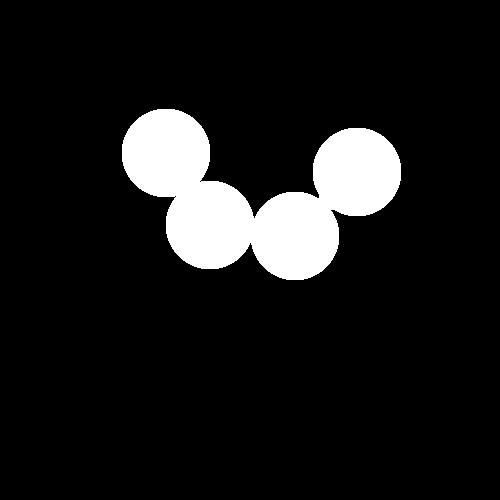

In [3]:
;; Read black&white image
(defparameter *image* (imago:read-image "~/.quicklisp/local-projects/cl-watershed/docs/disks.pbm"))
(imago-jupyter:show-image *image*)

In [5]:
(defun binary-segmentation (image seeds-list)
  (let* ((edt (imago:distance-transform image :type :edt :feature 0))
         (pixels (imago:image-pixels image))
         (seeds (aops:zeros* 'alexandria:non-negative-fixnum
                             (array-dimensions pixels))))
    (loop
       for label from 1 by 1
       for seed in seeds-list do
         (setf (apply #'aref seeds seed) label))
    (cl-watershed:watershed
     edt seeds
     (aops:vectorize* 'boolean (pixels) (not (zerop pixels))))))

BINARY-SEGMENTATION

In [8]:
(defparameter *segments*
  (binary-segmentation *image*
                       ;; 4 centers of our disks
                       '((156 164)
                         (219 201)
                         (237 292)
                         (172 365))))

*SEGMENTS*

*COLORS*

*IMAGE-SEGM*

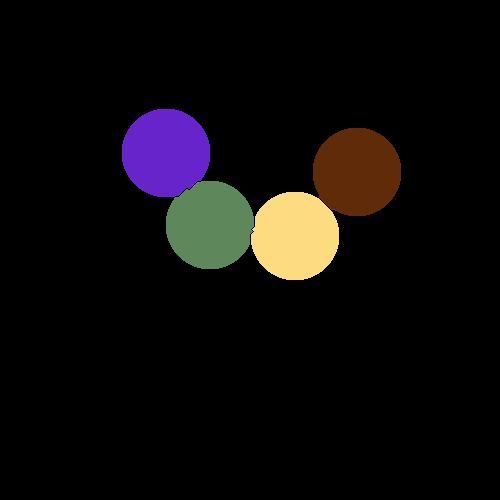

In [9]:
;; Get random colors for segments and black for no label and watershed line
(defparameter *colors*
  (list* (imago:make-color 0 0 0)
         (imago:make-color 0 0 0)
         (loop repeat 4 collect
               (imago:make-color (random 256)
                                 (random 256)
                                 (random 256)))))
;; Create segmnted image
(defparameter *image-segm*
  (make-instance 'imago:rgb-image
                 :pixels (aops:vectorize* 'imago:rgb-pixel (*segments*)
                                          (nth (1+ *segments*) *colors*))))
(imago-jupyter:show-image *image-segm*)